In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)

sns.set(style="whitegrid", font_scale=1.1)


In [3]:
df = pd.read_csv("/home/hadiii/python3/ChurnData.csv")
print("Shape:", df.shape)
df.head()

Shape: (200, 28)


,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [4]:
df = df.drop_duplicates()
print(df.isnull().sum())

tenure      0
age         0
address     0
income      0
ed          0
employ      0
equip       0
callcard    0
wireless    0
longmon     0
tollmon     0
equipmon    0
cardmon     0
wiremon     0
longten     0
tollten     0
cardten     0
voice       0
pager       0
internet    0
callwait    0
confer      0
ebill       0
loglong     0
logtoll     0
lninc       0
custcat     0
churn       0
dtype: int64


In [5]:
X = df.drop("churn", axis=1)
y = df["churn"]
numeric_features = X.columns.tolist()

In [6]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features)
    ]
)

log_reg = LogisticRegression(max_iter=2000)

pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", log_reg)
])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
pipeline.fit(X_train, y_train)


,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [8]:
y_pred = pipeline.predict(X_test)

print("\n=== Model Performance ===")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))


=== Model Performance ===
Accuracy : 0.7
Precision: 0.5
Recall   : 0.3333333333333333
F1 Score : 0.4

=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.75      0.86      0.80        28
         1.0       0.50      0.33      0.40        12

    accuracy                           0.70        40
   macro avg       0.62      0.60      0.60        40
weighted avg       0.68      0.70      0.68        40



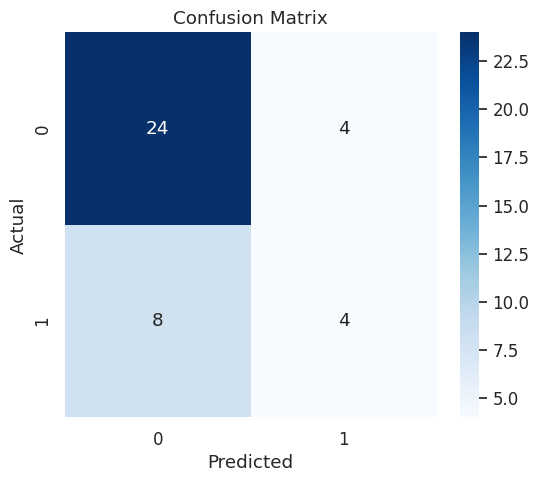

In [9]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [10]:
model = pipeline.named_steps["model"]
scaler = pipeline.named_steps["preprocess"]

coef = model.coef_[0]

feature_importance = pd.Series(coef, index=numeric_features)
feature_importance = feature_importance.sort_values(key=np.abs, ascending=False)

print("\n=== Logistic Regression Feature Importance ===")
print(feature_importance)


=== Logistic Regression Feature Importance ===
callcard   -1.049935
employ     -0.933655
cardmon     0.771298
confer     -0.691553
lninc       0.617491
tenure     -0.596961
age        -0.469648
loglong    -0.375464
wiremon     0.366511
ebill       0.354823
internet    0.317922
tollten     0.310934
tollmon     0.306016
callwait    0.295159
equipmon    0.234192
income     -0.233615
longten     0.226742
cardten    -0.191036
pager      -0.122648
address    -0.110680
longmon     0.100135
voice       0.089554
custcat    -0.085154
ed         -0.079257
logtoll     0.066756
equip      -0.036423
wireless   -0.010828
dtype: float64


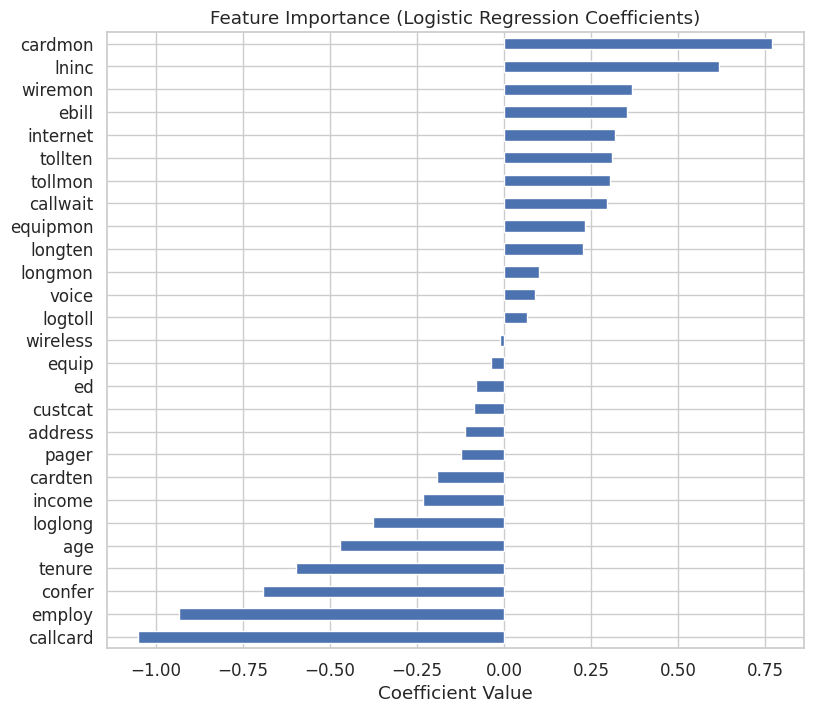

In [11]:
plt.figure(figsize=(9, 8))
feature_importance.sort_values().plot(kind='barh')
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.show()